In [74]:
import pandas as pd 
import matplotlib

%matplotlib inline


In [75]:
def parser(x):
    return pd.datetime.strptime(x,'%Y-%m-%d')
 
train_df = pd.read_csv('train.csv', header=0,usecols=['date','store','item','sales'])
train_df = train_df[train_df['store']==1]
train_df = train_df[train_df['item']==1]


train_df.head()

df=train_df.copy()

In [76]:
df['date'].min(), df['date'].max()
df['date'] = pd.to_datetime(df['date'])

In [77]:
df = df.groupby('date')['sales'].sum().reset_index()
df.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [78]:
df=df.set_index('date')
y=df

In [97]:
y = df['sales'].resample('MS').sum()

In [98]:
y

date
2013-01-01    328
2013-02-01    322
2013-03-01    477
2013-04-01    522
2013-05-01    531
2013-06-01    627
2013-07-01    661
2013-08-01    594
2013-09-01    519
2013-10-01    484
2013-11-01    572
2013-12-01    388
2014-01-01    435
2014-02-01    405
2014-03-01    549
2014-04-01    573
2014-05-01    651
2014-06-01    710
2014-07-01    746
2014-08-01    671
2014-09-01    566
2014-10-01    555
2014-11-01    619
2014-12-01    409
2015-01-01    428
2015-02-01    399
2015-03-01    552
2015-04-01    652
2015-05-01    711
2015-06-01    748
2015-07-01    842
2015-08-01    706
2015-09-01    678
2015-10-01    647
2015-11-01    684
2015-12-01    460
2016-01-01    449
2016-02-01    450
2016-03-01    589
2016-04-01    694
2016-05-01    782
2016-06-01    790
2016-07-01    903
2016-08-01    727
2016-09-01    709
2016-10-01    699
2016-11-01    662
2016-12-01    496
2017-01-01    485
2017-02-01    487
2017-03-01    561
2017-04-01    677
2017-05-01    773
2017-06-01    850
2017-07-01    873
2017-

In [99]:
train=y[0:-12]
valid=y[-12:]

In [100]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

model = auto_arima(train, trace=True, start_p=3, start_q=3, start_P=1, start_Q=5,
                     max_p=7, max_q=7, max_P=7, max_order=20,max_Q=6,D=1,d=1, m=12,seasonal=True,
                     stepwise=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=12)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set


Fit ARIMA: order=(3, 1, 3) seasonal_order=(1, 1, 5, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=355.259, BIC=358.370, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=348.247, BIC=354.469, Fit time=0.312 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=346.789, BIC=351.455, Fit time=0.109 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=348.035, BIC=354.257, Fit time=0.160 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=348.099, BIC=354.320, Fit time=0.108 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=346.138, BIC=353.915, Fit

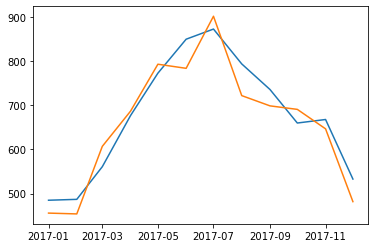

In [101]:
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

In [102]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -168.069
Date:                            Sat, 24 Aug 2019   AIC                            346.138
Time:                                    12:47:16   BIC                            353.915
Sample:                                         0   HQIC                           348.822
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -7.5115     11.752     -0.639      0.523     -30.546      15.522
ar.L1         -1.3696      0.255     -5.381      0.000      -1.868      -0.871
ar.L2         -0.6083      0.160     -3.805      0.000      -0.922      -0.295
ma.L1          0.8717      0.224      3.897      0.000       0.433       1.310
sigma2       843.0401    255.422      3.301      0.001     342.422    1343.659
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 5.72
Prob(Q):                               nan   Prob(JB):                         0.06
Heteroskedasticity (H):               0.65   Skew:                             0.87
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error
expected =  valid
predictions = forecast

mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 37.157225
MSE: 1695.404586
RMSE: 41.175291
